In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


#importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##idvide dataset into dependent and independent

In [ ]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

##Feature engineering

In [ ]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender =  pd.get_dummies(X['Gender'],drop_first = True)

In [ ]:
X = X.drop(['Geography','Gender'],axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
pd.concat([X,geography,gender],axis = 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


## spliting the dataset into train test and split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## vvi  feature scaling is required where distance measure is there

## eg: ANN,LR,LOGISTIC REGRESION

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [ ]:
X_train.shape

(8000, 8)

##Creating the ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

## initialize the ANN

In [ ]:
classifier = Sequential()


## adding the input layer

In [ ]:
classifier.add(Dense(units = 8,activation = 'relu'))

## adding the first hidden layer

In [ ]:
classifier.add(Dense(units= 6,activation = 'relu'))
classifier.add(Dropout(0.2))


In [ ]:
### adding the second hidden layer
classifier.add(Dense(units = 8,activation = 'relu'))


## adding the output layer

In [ ]:
classifier.add(Dense(1,activation = 'sigmoid'))    #### sigmoid use kiya kuki binary clasification last me

## now train my entire neural network

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
classifier.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

## early stopping

In [ ]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
    
)

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000,callbacks = early_stopping)   

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.4623 - accuracy: 0.7944 - val_loss: 0.4379 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4226 - accuracy: 0.8026 - val_loss: 0.4102 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4017 - accuracy: 0.8337 - val_loss: 0.3886 - val_accuracy: 0.8448
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3973 - accuracy: 0.8369 - val_loss: 0.3881 - val_accuracy: 0.8440
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3929 - accuracy: 0.8451 - val_loss: 0.3802 - val_accuracy: 0.8478
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3867 - accuracy: 0.8446 - val_loss: 0.3895 - val_accuracy: 0.8478
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3865 - accuracy: 0.8462 - val_loss: 0.3798 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## summarize  history for accuracy

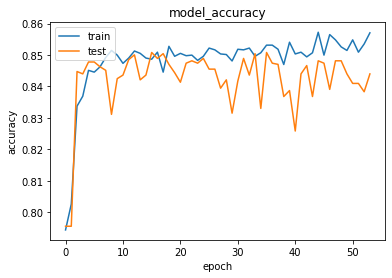

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

## summerize history for loss accuracy

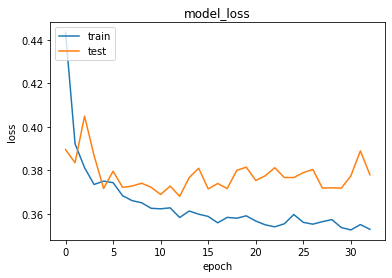

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

### maling the prediction and evaluating the model

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


##maing the confusion matrix

In [ ]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[1557,  255],
       [  38,  150]])

## calculating the accuracy

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.8535

In [ ]:
classifier.get_weights()

[array([[-0.29224545, -0.16747667,  0.01513716, -0.1410785 , -0.8023806 ,
         -0.2024831 ,  0.29170945,  0.14843975],
        [ 2.0486624 ,  1.0510963 ,  0.89788187,  0.20755598,  0.01283139,
          3.0741203 ,  2.1179798 , -1.6623615 ],
        [-0.12035375, -0.85280097,  0.30020615,  0.08708445,  0.79085004,
         -0.2169757 ,  0.03896113, -0.12120732],
        [ 0.7782894 ,  0.327155  ,  0.22024027, -2.447062  , -1.1074425 ,
          0.4013152 , -0.8738919 , -1.5619401 ],
        [ 0.20244484,  1.0509629 ,  2.74689   , -1.7888701 , -0.7341898 ,
         -1.6140742 ,  0.29625154,  0.93820494],
        [ 0.07956654,  1.0670197 ,  0.05530664,  0.11195916, -0.01089167,
         -0.35325086, -0.08892635,  0.15250987],
        [ 1.020482  , -0.40746695, -0.2058554 , -0.10473234, -0.5832569 ,
         -0.5749373 ,  0.4935937 ,  0.60949993],
        [-0.41505504, -0.48408082,  0.32423598,  0.29624212,  1.0064684 ,
         -0.08773763,  0.33258736,  0.15869053]], dtype=float32),